In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv("SA_Aqar.csv")

# Let's clean the dataset

In [3]:
#First, let's check of duplicate records in the dataset.
print(df.duplicated().sum())

2197


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [5]:
#Apperantly, 2197 records out of 3718 records are duplicates
#Removing duplicates records
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 2824
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          1521 non-null   object
 1   district      1521 non-null   object
 2   front         1521 non-null   object
 3   size          1521 non-null   int64 
 4   property_age  1521 non-null   int64 
 5   bedrooms      1521 non-null   int64 
 6   bathrooms     1521 non-null   int64 
 7   livingrooms   1521 non-null   int64 
 8   kitchen       1521 non-null   int64 
 9   garage        1521 non-null   int64 
 10  driver_room   1521 non-null   int64 
 11  maid_room     1521 non-null   int64 
 12  furnished     1521 non-null   int64 
 13  ac            1521 non-null   int64 
 14  roof          1521 non-null   int64 
 15  pool          1521 non-null   int64 
 16  frontyard     1521 non-null   int64 
 17  basement      1521 non-null   int64 
 18  duplex        1521 non-null   int64 
 19  stairs

# Feature engineering

In [7]:
#All columns in this dataset are important except 'details' since it has uniuqe values in every record.
df.drop('details', inplace=True, axis=1)

In [8]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,0,1,0,1,1,0,0,80000
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,0,1,0,0,1,0,0,60000
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,1,0,1,0,0,1,0,0,60000
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0,1,0,0,0,0,0,55000
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,1,0,1,0,1,1,0,0,70000


In [ ]:
#Before alculating the correlation coefficient, we need to deal with string values appearing in city, district and front.
#We will give all city, district and front values unique codes.

In [9]:
ordEnc = OrdinalEncoder()
df["city_code"] = ordEnc.fit_transform(df[["city"]])
df["district_code"] = ordEnc.fit_transform(df[["district"]])
df["front_code"] = ordEnc.fit_transform(df[["front"]])

In [10]:
#Reordering the columns in the dataframe.
df = df[['city','city_code','district','district_code','front','front_code','size'
         ,'property_age','bedrooms','bathrooms','livingrooms','kitchen','garage','driver_room',
           'maid_room','furnished','ac','roof','pool','frontyard',
         'basement','duplex','stairs','elevator','fireplace','price']]

In [11]:
df.head(10)

,city,city_code,district,district_code,front,front_code,size,property_age,bedrooms,bathrooms,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,الرياض,2.0,حي العارض,79.0,شمال,6.0,250,0,5,5,...,0,0,0,1,0,1,1,0,0,80000
1,الرياض,2.0,حي القادسية,92.0,جنوب,2.0,370,0,4,5,...,0,0,0,1,0,0,1,0,0,60000
2,الرياض,2.0,حي القادسية,92.0,جنوب,2.0,380,0,4,5,...,0,1,0,1,0,0,1,0,0,60000
3,الرياض,2.0,حي المعيزلة,109.0,غرب,9.0,250,0,5,5,...,0,0,0,1,0,0,0,0,0,55000
4,الرياض,2.0,حي العليا,86.0,غرب,9.0,400,11,7,5,...,0,1,0,1,0,1,1,0,0,70000
5,الرياض,2.0,حي الازدهار,7.0,شرق,5.0,250,25,5,4,...,1,0,0,1,0,1,1,0,0,45000
6,الرياض,2.0,حي المهدية,120.0,شمال,6.0,250,0,5,5,...,0,0,0,0,0,1,1,0,0,45000
8,الرياض,2.0,حي الحزم,30.0,جنوب شرقي,3.0,288,6,5,5,...,1,0,0,1,0,1,1,0,0,37000
9,الرياض,2.0,حي العليا,86.0,جنوب غربي,4.0,250,0,4,4,...,1,0,0,1,0,0,1,0,0,150000
10,الرياض,2.0,حي العارض,79.0,شمال,6.0,290,0,3,5,...,1,0,0,1,0,1,0,0,0,150000


In [ ]:
#city codes:
# جدة = 3.0
# الرياض = 2.0
# الدمام = 1.0
# الخبر = 0.0

#front codes:
# ثلاث شوارع = 0.0 
# اربع شوارع = 1.0
# جنوب = 2.0
# جنوب شرقي = 3.0
# جنوب غربي = 4.0
# شرق = 5.0
# شمال = 6.0
# شمال شرقي = 7.0
# شمال غربي = 8.0
# غرب = 9.0

#districts codes from 0.0 - 173.0

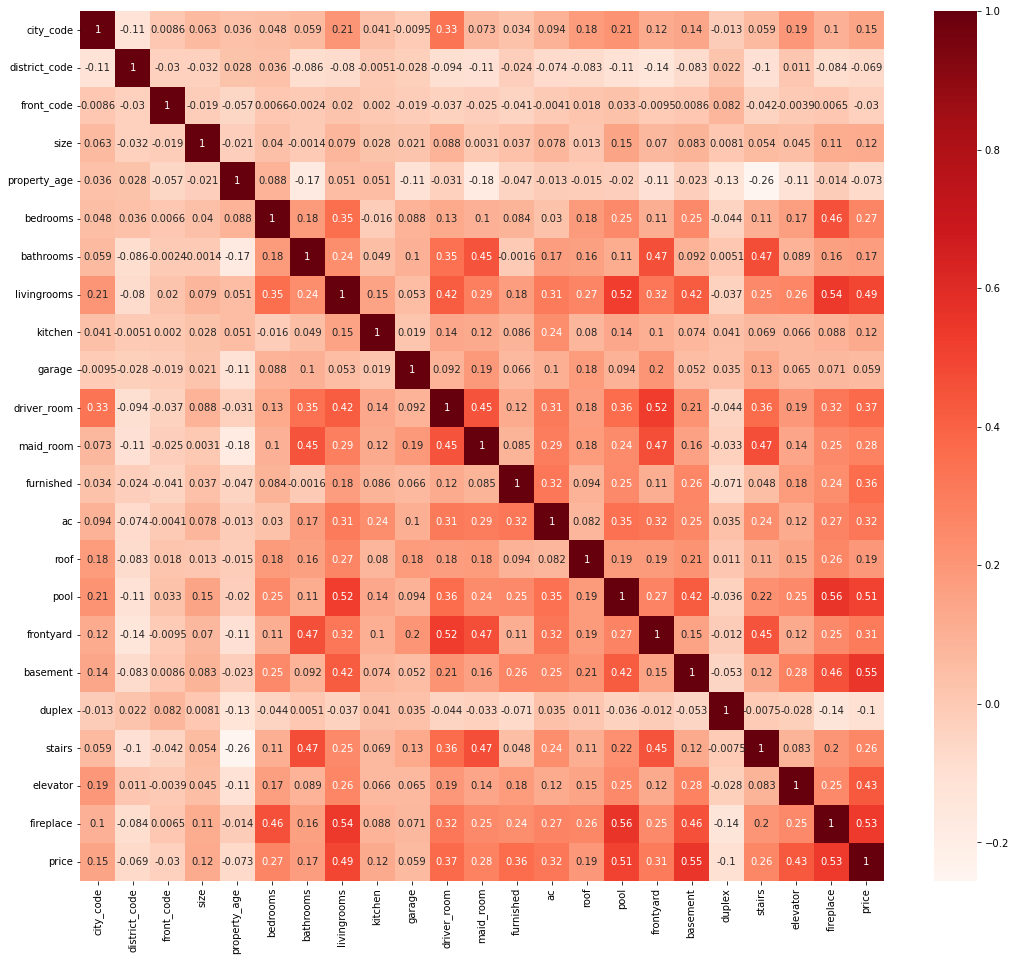

In [12]:
#Calculating the correlation coefficient
plt.figure(figsize=(18,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#We should take the features that has highest number comparing with (price) feature, which are: 
#From high values to lower: basement, fireplace, pool, livingrooms, elevator, driver_room, furnished.

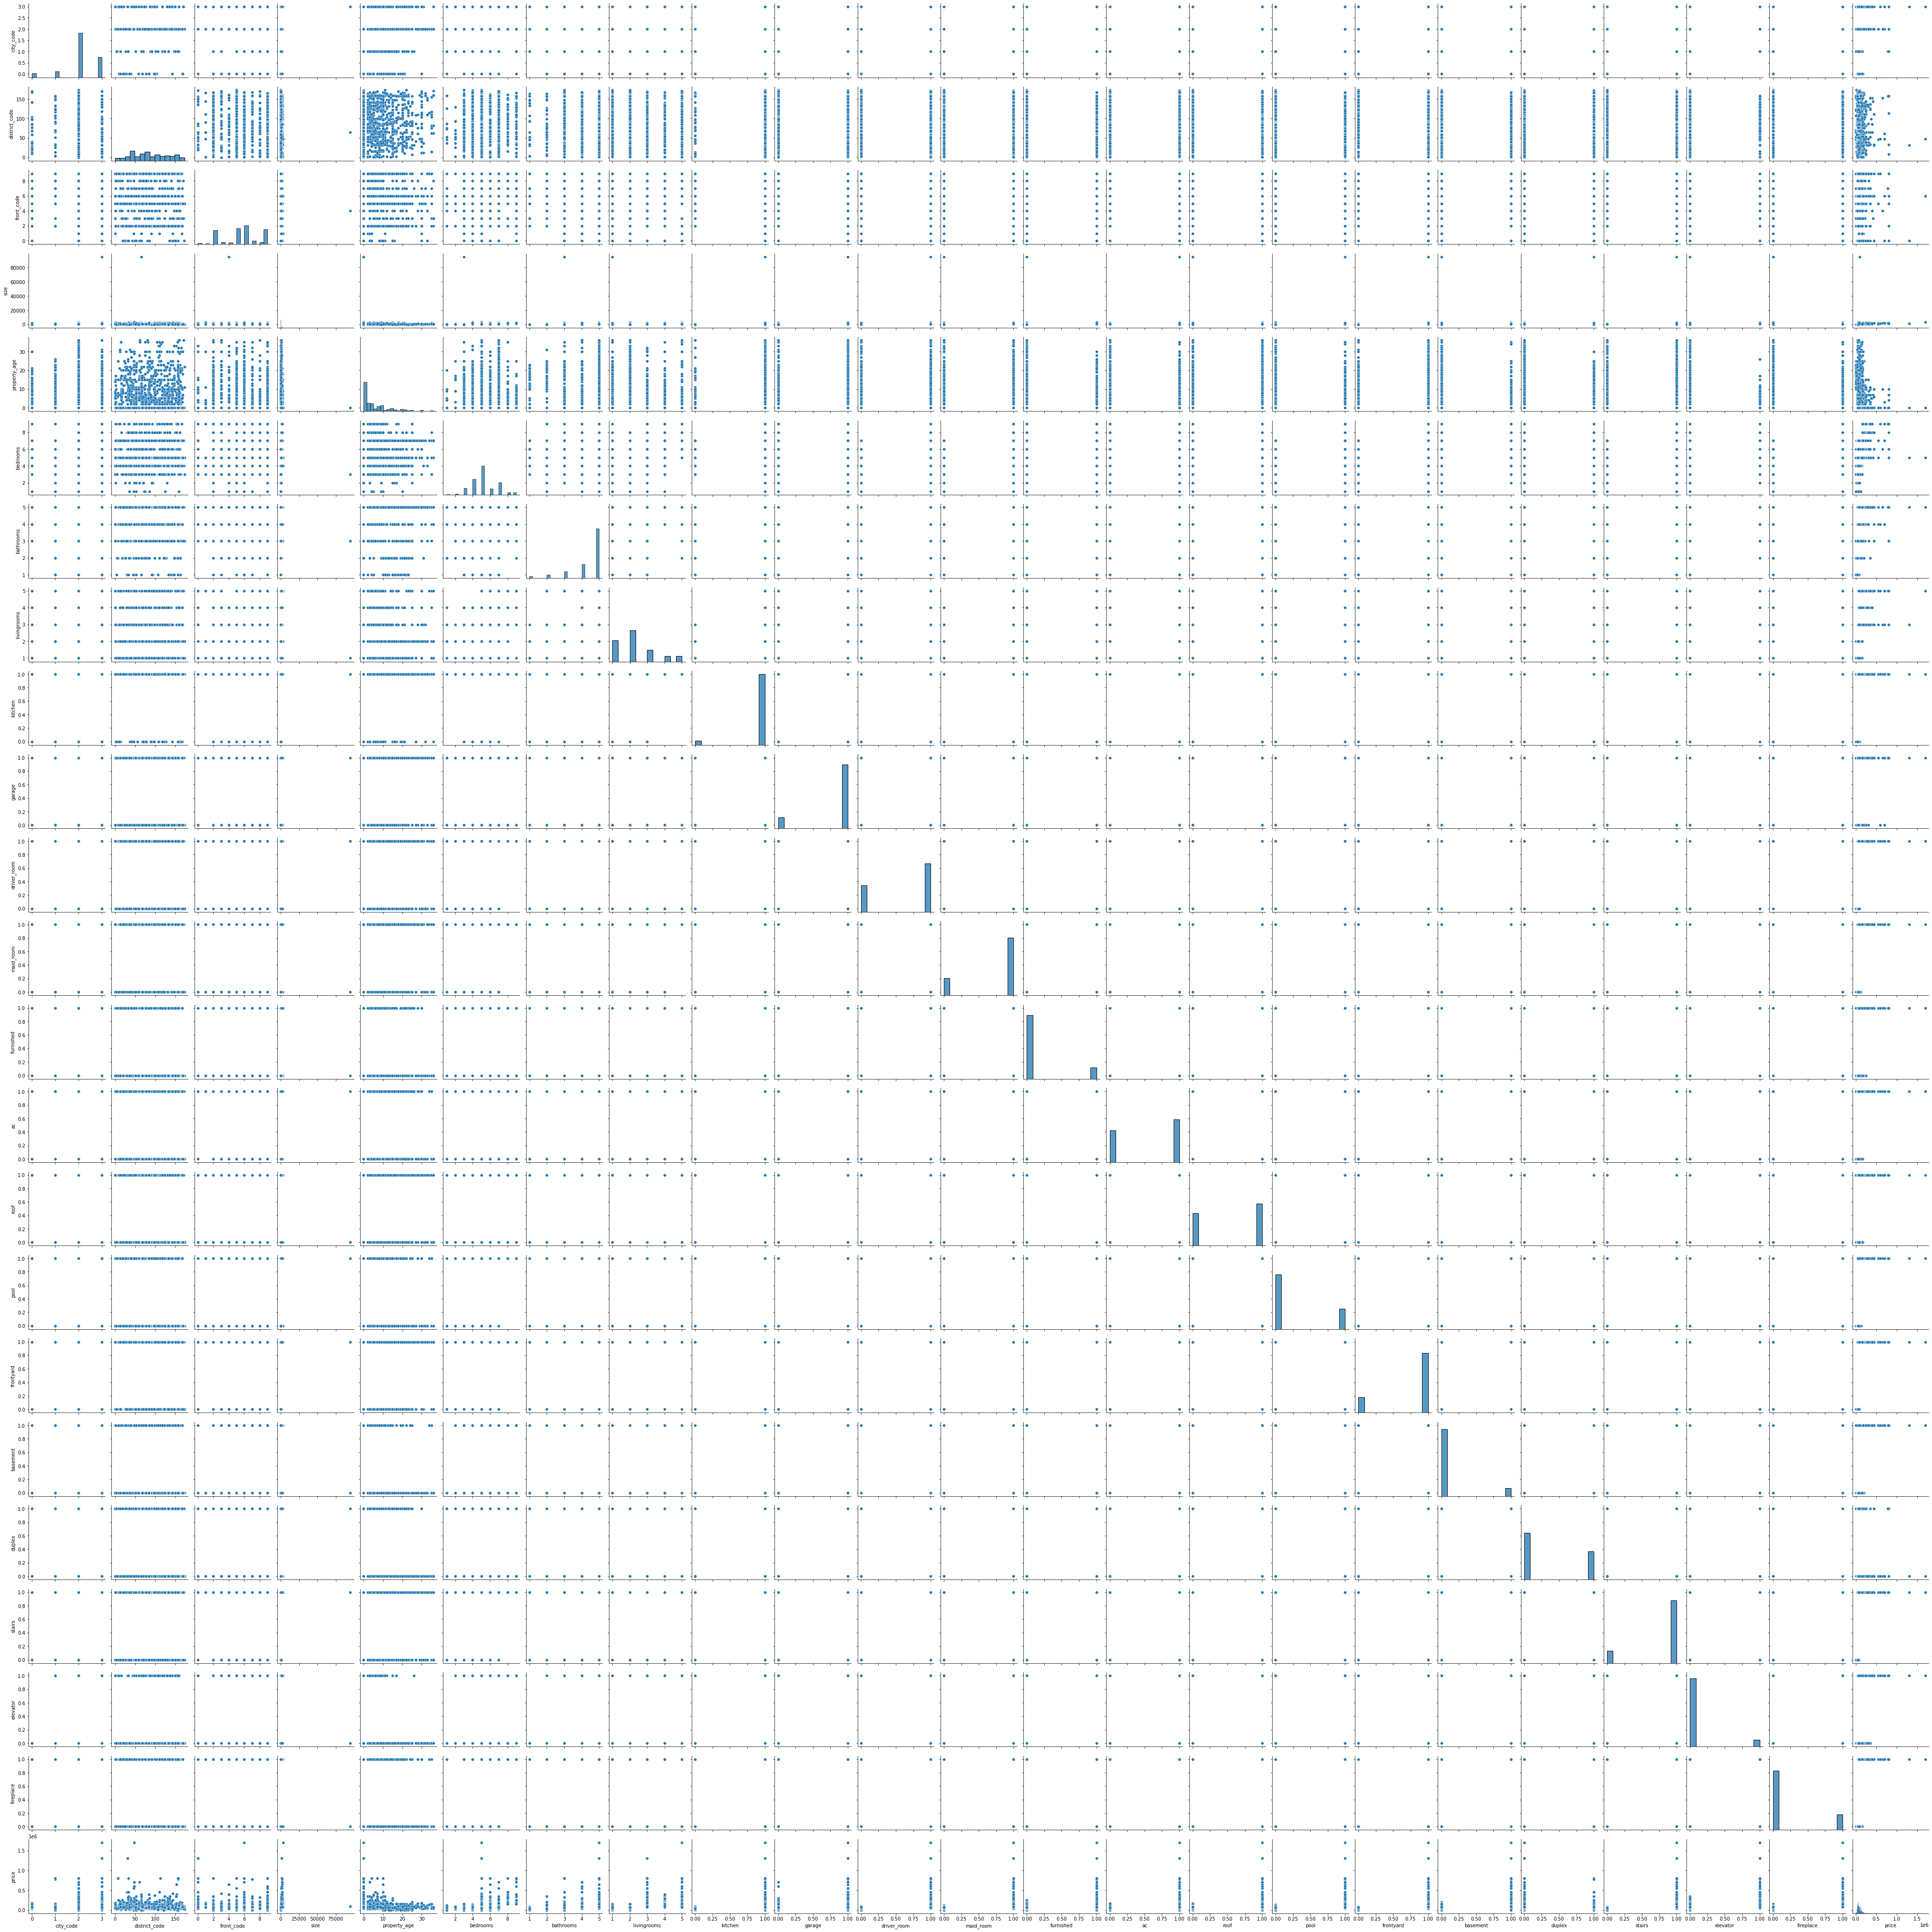

In [13]:
#Plot pairwise relationships
sns.pairplot(df)

# We can see strong proportional relationships between bathrooms, property_age, bedrooms, kitchen, livingrooms, driver_room, maid_room garage and city_code (الرياض & جدة), front_yard, pool, basement, elevator, fire_place compared with price.

In [20]:
#Taking price as a response variable (dependent variable)
y = df.price
y

0       80000
1       60000
2       60000
3       55000
4       70000
        ...  
1516    50000
1517    75000
1518    85000
1519    65000
1520    80000
Name: price, Length: 1521, dtype: int64

In [22]:
#Dropping string featrues and low correlation coefficient number features.
X = df.drop(['city','district','front','price', 'district_code','front_code','size','property_age'
             ,'bedrooms','bathrooms','kitchen','garage','frontyard','duplex','stairs','roof','city_code',
             'ac','maid_room'], axis=1)
X

,livingrooms,driver_room,furnished,pool,basement,elevator,fireplace
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,1,0,0,0,0,0
3,2,1,0,0,0,0,0
4,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1516,1,0,1,0,0,0,0
1517,2,1,1,0,0,0,0
1518,3,0,0,0,0,0,1
1519,2,0,0,0,0,0,0


In [23]:
#80 20 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape, y_train.shape

((1216, 7), (1216,))

In [25]:
X_test.shape, y_test.shape

((305, 7), (305,))

# Linear Regression model

In [36]:
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
x = r2_score(y_test, y_pred)
print(x)

0.7566147028260769


# We had 0.75 value for r^2 which does not mean the accuracy of the model since regression problems cannot be mesaured by accuracy.
# So r^2 indicates the space between the line of x and y in the scatter polt below and the actual values in the test set.
# 0.75 is not the best value we can get in regression problems but for this dataset which extracted from a real estate advertisements website, and advertisements websites usually need very heavy cleaning, but for this project we can consider it as a satisfying result.

# Scatter plot for Linear Regression

C:\Users\Moaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

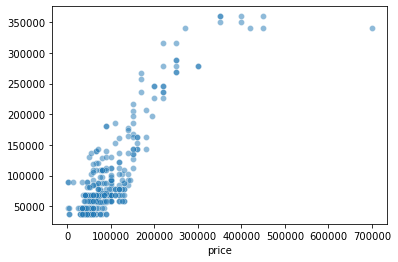

In [37]:
sns.scatterplot(y_test, y_pred, alpha=0.5)